
1. Crie uma função `mirror`, que recebe `img` (`np.array`), `reverse_x` (`bool`) e `reverse_y` (`bool`) e retorna uma nova imagem, onde caso `reverse_EIXO` seja verdadeiro, esta deve ser `img` espelhada em EIXO. Em seguida, teste sua função com uma imagem de sua escolha.

(1080, 1080, 3)


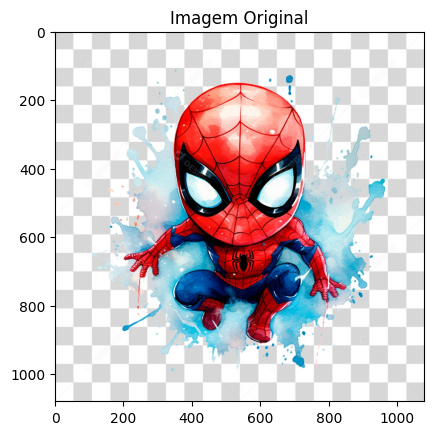

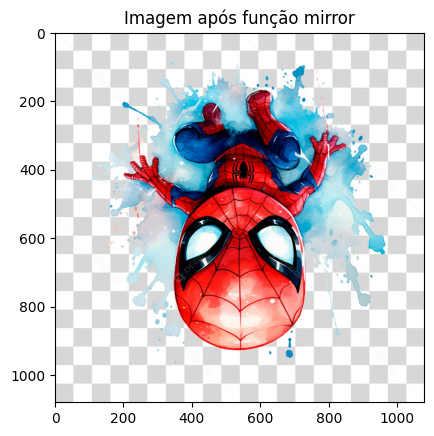

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Função mirror
def mirror(img, reverse_x, reverse_y):

    imageMirrored = img[:,:]

    if (reverse_x):        
        # Reflexão em X (vertical)
        imageMirrored = imageMirrored[::-1, :]  # Espelha invertendo as linhas

    if (reverse_y):
        # Reflexão em Y (horizontal)
        imageMirrored = imageMirrored[:, ::-1]       

    return imageMirrored    



# Carregar a imagem
imagem = np.array(Image.open('homemaranha.png').convert("RGB"))
# Obter dimensões corretamente

(l, c, canais) = imagem.shape  # Pegamos os 3 valores: altura, largura e canais (RGB)

x, y = True, False

imageMirrored = mirror(imagem, x, y)

print(imagem.shape)
plt.imshow(imagem)
plt.title("Imagem Original")
plt.show()

plt.imshow(imageMirrored)
plt.title("Imagem após função mirror")
plt.show()


2. Escolha uma imagem qualquer e realize um cisalhamento nela, sendo os fatores de sua escolha.

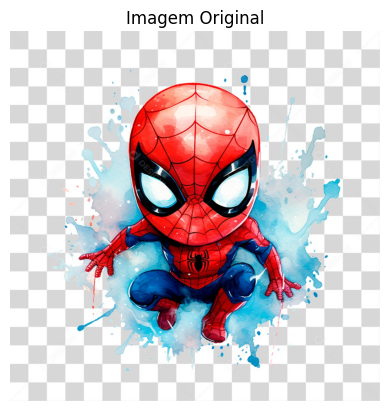

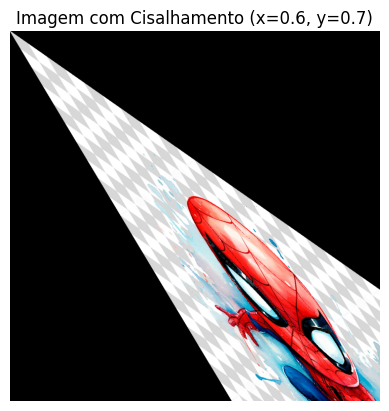

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imagem = Image.open('homemaranha.png').convert("RGB")
imagem_array = np.array(imagem)

shear_x = 0.6
shear_y = 0.7

l, c, canais = imagem_array.shape

M = np.array([
    [1, shear_x, 0],
    [shear_y, 1, 0]
])

coords = np.indices((l, c), dtype=np.float32)
coords = np.vstack((
    coords[1].flatten(),  
    coords[0].flatten(),
    np.ones((l * c))
))

new_coords = M @ coords
new_x = new_coords[0].reshape((l, c))
new_y = new_coords[1].reshape((l, c))

cisalhada = np.zeros_like(imagem_array)

for i in range(l):
    for j in range(c):
        x, y = int(new_x[i, j]), int(new_y[i, j])
        if 0 <= x < c and 0 <= y < l:
            cisalhada[y, x] = imagem_array[i, j]

plt.imshow(imagem_array)
plt.title("Imagem Original")
plt.axis("off")
plt.show()

plt.imshow(cisalhada)
plt.title(f"Imagem com Cisalhamento (x={shear_x}, y={shear_y})")
plt.axis("off")
plt.show()


3. **(Desafio)** Escreva uma função que realize uma mudança de escala por interpolação bilinear em uma imagem.

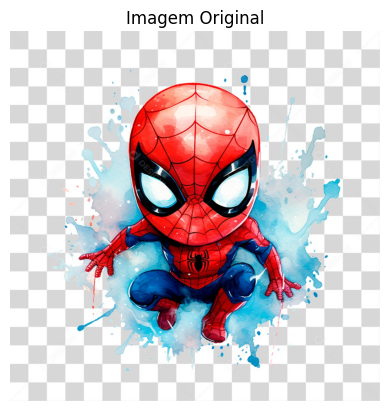

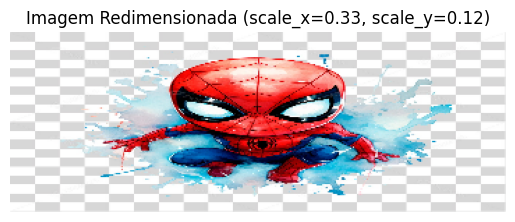

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation(img, scale_x, scale_y):
    img_array = np.array(img)
    orig_h, orig_w, canais = img_array.shape

    new_h = int(orig_h * scale_y)
    new_w = int(orig_w * scale_x)

    x = np.linspace(0, orig_w - 1, new_w)
    y = np.linspace(0, orig_h - 1, new_h)
    x_orig, y_orig = np.meshgrid(x, y)

    x0 = np.floor(x_orig).astype(np.int32)
    x1 = np.clip(x0 + 1, 0, orig_w - 1)
    y0 = np.floor(y_orig).astype(np.int32)
    y1 = np.clip(y0 + 1, 0, orig_h - 1)

    dx = x_orig - x0
    dy = y_orig - y0

    top = (1 - dx)[..., np.newaxis] * img_array[y0, x0] + dx[..., np.newaxis] * img_array[y0, x1]
    bottom = (1 - dx)[..., np.newaxis] * img_array[y1, x0] + dx[..., np.newaxis] * img_array[y1, x1]
    
    interpolated_img = ((1 - dy)[..., np.newaxis] * top + dy[..., np.newaxis] * bottom).astype(np.uint8)

    return Image.fromarray(interpolated_img)

imagem = Image.open('homemaranha.png').convert("RGB")

scale_x = 0.33
scale_y = 0.12

imagem_redimensionada = bilinear_interpolation(imagem, scale_x, scale_y)

plt.imshow(imagem)
plt.title("Imagem Original")
plt.axis("off")
plt.show()

plt.imshow(imagem_redimensionada)
plt.title(f"Imagem Redimensionada (scale_x={scale_x}, scale_y={scale_y})")
plt.axis("off")
plt.show()


## Exercício da parte 2
Implemente o algortimo de conversão **<font color="red">R</font><font color="green">G</font><font color="blue">B</font>** para **HSV**, utilizando uma imagem de sua escolha.

Dicas:
* Você pode confirmar o resultado da sua conversão utilizando os métodos `minha_imagem_rgb.convert('HSV')` e `minha_imagem_hsv.convert('RGB')`, **considerando que as duas imagens são do PIL**, e depois convertendo-as para arrays do NumPy. Se as imagens forens iguais, sua conversão está correta;
* A operação $\frac{\Delta}{C_{max}}$ pode resultar em $\frac{0}{0}$. Neste caso, qualquer valor pode ser atribuído a $S$;
* Imagens do NumPy apresentam valores na faixa $[0; 1]$ (ou $[0; 255]$). Sendo assim, lembre-se de dividir $H$ por $360°$ (e depois multiplicar por $255$ caso seja um `np.uint8`).

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def rgb_para_hsv(img):
    img_array = np.array(img) / 255.0  # Normaliza para [0, 1]
    r, g, b = img_array[..., 0], img_array[..., 1], img_array[..., 2]

    c_max = np.max(img_array, axis=2)
    c_min = np.min(img_array, axis=2)
    delta = c_max - c_min

    h = np.zeros_like(c_max)

    # Calcula Hue (H)
    mask = delta != 0
    idx = (c_max == r) & mask
    h[idx] = (60 * ((g[idx] - b[idx]) / delta[idx])) % 360

    idx = (c_max == g) & mask
    h[idx] = (60 * ((b[idx] - r[idx]) / delta[idx]) + 120) % 360

    idx = (c_max == b) & mask
    h[idx] = (60 * ((r[idx] - g[idx]) / delta[idx]) + 240) % 360

    h = h / 360  # Normaliza H para [0, 1]

    # Calcula Saturação (S)
    s = np.zeros_like(c_max)
    s[c_max != 0] = delta[c_max != 0] / c_max[c_max != 0]

    # Valor (V)
    v = c_max

    hsv = np.stack([h, s, v], axis=2)
    hsv = (hsv * 255).astype(np.uint8)  # Converte para [0, 255]
    return Image.fromarray(hsv)

imagem = Image.open('homemaranha.png').convert("RGB")
imagem_hsv = rgb_para_hsv(imagem)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem)
plt.title("Imagem Original (RGB)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagem_hsv)
plt.title("Imagem Convertida (HSV)")
plt.axis("off")

plt.show()
